# Load in packages

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load in data

In [7]:
# fetch dataset 
wine = fetch_ucirepo(id=186) 

# data (as pandas dataframes)
df = wine.data.features
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [8]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


# Simple Linear Regression

In [28]:
# Fit the regression model
X = sm.add_constant(df['volatile_acidity'])  # Adds a constant term to the predictor
model = sm.OLS(df['residual_sugar'], X)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         residual_sugar   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     20.32
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           6.71e-06
Time:                        20:54:02   Log-Likelihood:                -14892.
No. Observations:                4898   AIC:                         2.979e+04
Df Residuals:                    4896   BIC:                         2.980e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.4913      0.212  

In [18]:
### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=0.9852807761010499, p-value=0.6431183817842444


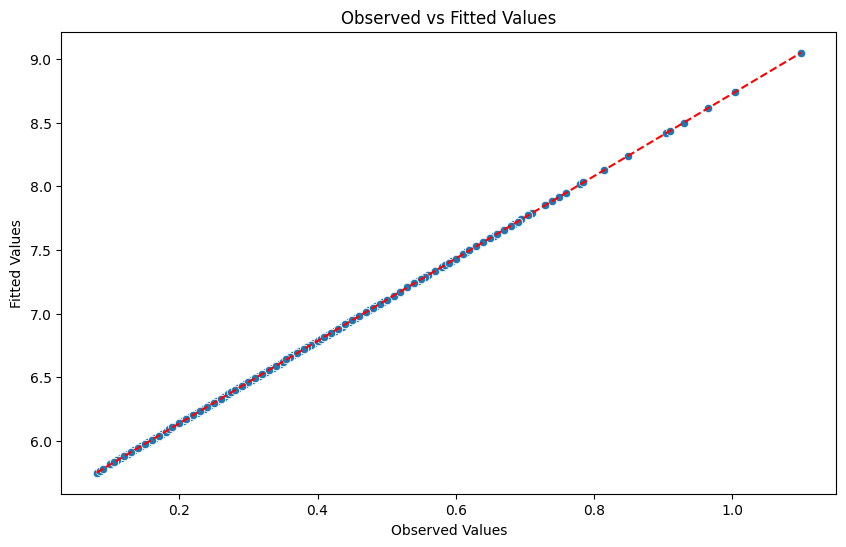

In [19]:
residuals = results.resid
fitted = results.fittedvalues

## A significant p-value indicates that the relationship is not linear.
# Plot observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['volatile_acidity'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['volatile_acidity']), max(df['volatile_acidity'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()

Shapiro-Wilk Test: W=0.8905397057533264, p-value=0.0


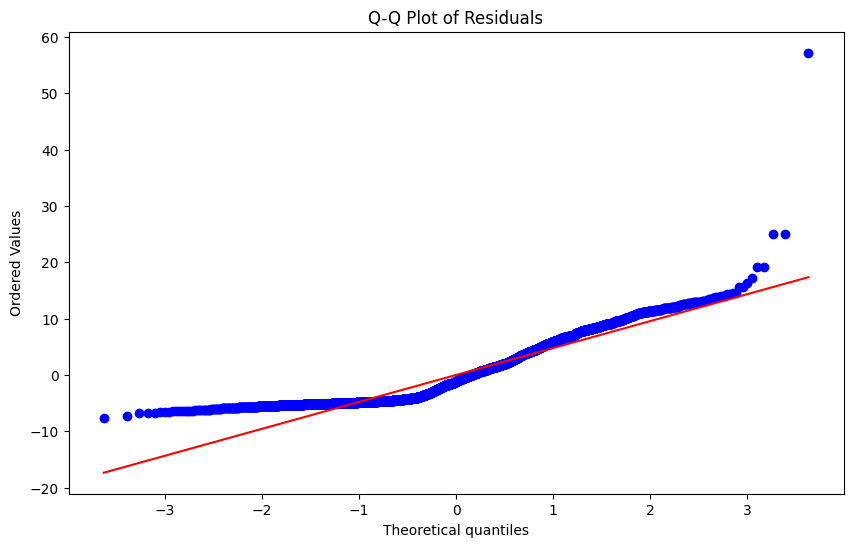

In [21]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [22]:
##### Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=0.9876160069150063, p-value=0.6210274753547593


## Checking the assumptions
+ The Rainbow test shows a p-value of 0.6431, which is greater than 0.05. This means that there is a linear reationship between the dependent and independent variables.
+ The Shapiro-Wilk test shows a p-value of 0.0000, which is less than 0.05. This means that the residuals are not normally distributed.
+ The Goldenfeld-Quandt test shows a p-value of 0.6210, which is greater than 0.05. This means that the residuals are homoskedastic.

## Model evaluation
+ The adjusted R-squared value is 0.0004, which shows that the independent variable is not a good predictor of the dependent variable.

## Reasoning behind dataset and variables
+ I chose this dataset because it has multiple variables that can be used to predict the dependent variable. I chose the independent variable because it is the most relevant to the dependent variable.

# Multiple Linear Regression

In [39]:
X = df[['fixed_acidity','volatile_acidity', 'pH', 'citric_acid', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'sulphates', 'alcohol']]
X = sm.add_constant(X)

model = sm.OLS(df['residual_sugar'], X)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         residual_sugar   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     5690.
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:03:25   Log-Likelihood:                -8689.0
No. Observations:                4898   AIC:                         1.740e+04
Df Residuals:                    4887   BIC:                         1.747e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2347.3840 

### Significance of variables
+ All the independent variables are significant in the model as their p-values are less than 0.05.

In [42]:
# Checking multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Data:")
print(vif_data)


VIF Data:
                Variable            VIF
0                  const  359066.112489
1          fixed_acidity       1.465467
2       volatile_acidity       1.136249
3                     pH       1.309198
4            citric_acid       1.162848
5              chlorides       1.188737
6    free_sulfur_dioxide       1.730956
7   total_sulfur_dioxide       2.199254
8                density       3.204648
9              sulphates       1.057428
10               alcohol       3.006529


In [43]:
### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=0.6358616529079032, p-value=0.9999999999999999


Shapiro-Wilk Test: W=0.8905397057533264, p-value=0.0


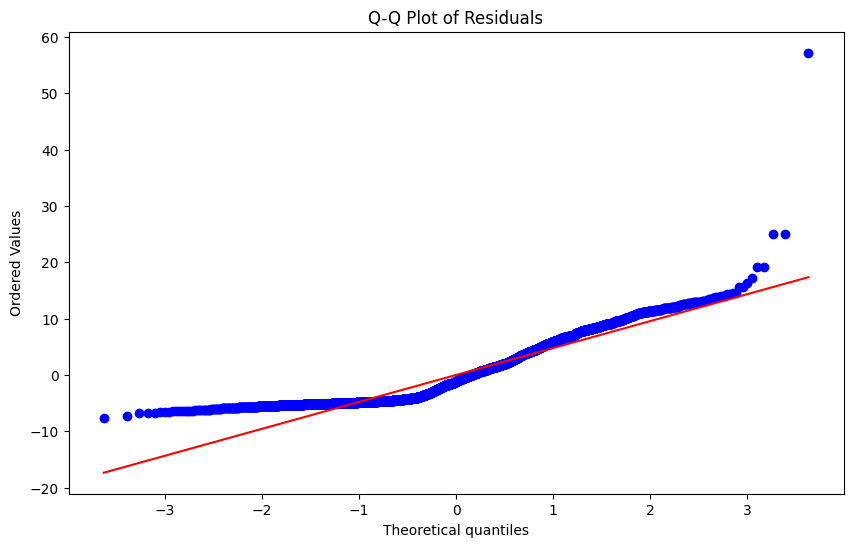

In [44]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [50]:
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=1.2281105877056333, p-value=2.0116336752081228e-07


### Checking the assumptions
+ Each independent variable has a VIF value of less than 10, which means that there is no multicollinearity in the model.
+ The Rainbow test shows a p-value of 0.9999, which is greater than 0.05. This means that there is a linear reationship between the dependent and independent variables.
+ The Shapiro-Wilk test shows a p-value of 0.0000, which is less than 0.05. This means that the residuals are not normally distributed.
+ The Goldenfeld-Quandt test shows a p-value of 2.011e-16, which is less than 0.05. This means that the residuals are heteroskedastic.

### Model evaluation
+ The adjusted R-squared value is 0.921, which shows that the independent variables are good predictors of the dependent variable.

### Reasoning behind dataset and variables
+ I chose this dataset because it has multiple variables that can be used to predict the dependent variable. I chose the independent variables because regression results show that they are significant in the model.